Importing all the packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PolarSi import *
import matplotlib
from scipy.optimize import curve_fit

Importing the image of the clouds

In [4]:
cloud = 'L328'

path_RA_grid = 'HRO_images/'+cloud + '_RA_low_res_grid.npy'
path_DEC_grid = 'HRO_images/'+cloud + '_DEC_low_res_grid.npy'
path_image = 'HRO_images/' + cloud + '_low_res.png'

# x_gradient,y_gradient,total_gradient,gradient_angle = Gaussian_derivative(path_image,25,1)

Importing the polarization data

#todo 
1. make a dummy dataset to check the polarization map generation (finished)
2. test new methods of polarization map generation
3. Try increasing the size of the gaussian derivative kernel

In [46]:
def mapping_func(grid_xx,grid_yy,x,y,f_x_y,tol = 0.001):
    """mapping_func

    This function maps f(x,y) onto (x,y) grid from a data array of x , y and f(x,y)
    
    Args:
        grid_xx (2D array): x coordinates mesh 
        grid-yy (2D array): y coordinates mesh 
        x (1D array): x coordinate value at which f is evaluated
        y (1D array): y coordinate value at which f is evaluated
        f_x_y (1D array): value of f evaluated at x and y
    Returns:
        mappped_func (2D array): f(x,y) mapped into (x,y)
    """
    mappped_func = np.zeros((grid_xx.shape[0],grid_yy.shape[1]))
    for i in range(f_x_y.shape[0]):
        temp = (abs(grid_xx - x[i])<tol)*(abs(grid_yy - y[i])<tol)*f_x_y[i]
        mappped_func += temp*(mappped_func==0)
    
    # plt.imshow(mappped_func)
    # plt.colorbar()
    # plt.show()
    # plot_image(mappped_func)
    return mappped_func

def mapping_funcv2(grid_xx,grid_yy,x,y,f_x_y,tol = 0.001):

    mappped_func = np.zeros((grid_xx.shape[0],grid_yy.shape[1]))

    for i in range(f_x_y.shape[0]):
        temp = (abs(grid_xx - x[i])<tol)*(abs(grid_yy - y[i])<tol)*f_x_y[i]
        mappped_func += (mappped_func*(temp != 0) + temp*(mappped_func != 0))*0.5 + temp*(mappped_func != 0)
    # plt.imshow(mappped_func)
    # plt.colorbar()
    # plt.show()
        # mappped_func += temp*(mappped_func==0)
    return mappped_func

def plot_image(a):
    plt.imshow(a)
    plt.colorbar()


In [58]:

# dummy_polarization_data = np.zeros_like(RA_grid)
# dummy_polarization_angle_data = np.zeros_like(RA_grid)
# for i in range(0,RA_grid.shape[0],10):
#     for j in range(0,RA_grid.shape[1],10):
#         dummy_polarization_angle_data[i,j] = np.random.randint(0,180)
#         dummy_polarization_data[i,j] = np.random.randint(1,6)


# plot_image(dummy_polarization_angle_data)
# RA_array = RA_grid.flatten()
# DEC_array = DEC_grid.flatten()
# dummy_polarization_array = dummy_polarization_data.flatten()
# dummy_polarization_angle_array = dummy_polarization_angle_data.flatten()
# output_df = pd.DataFrame({'ra':RA_array,'dec':DEC_array,'P':dummy_polarization_array,'PA':dummy_polarization_angle_array,})
# output_df = output_df[output_df['P'] > 0]
# print(output_df.head)
# output_df.to_csv('data_files_generated/dummy_polarization_map_data.csv')

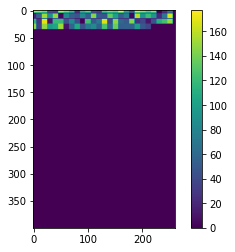

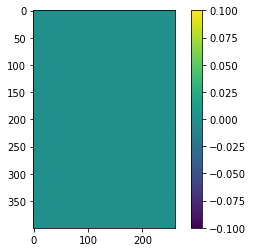

In [47]:
polarization_file = 'data_files_generated/dummy_polarization_map_data.csv'
RA_grid = np.load(path_RA_grid)
DEC_grid = np.load(path_DEC_grid)

polarization_data = pd.read_csv(polarization_file,delimiter=',')
polarization_RA = polarization_data['ra'][0:100]
polarization_DEC = polarization_data['dec'][0:100]
polarization = polarization_data['P'][0:100]
polarization_angle = polarization_data['PA'][0:100]
tol = abs(DEC_grid[1,0]-DEC_grid[0,0])*5

a = mapping_func(RA_grid,DEC_grid,polarization_RA,polarization_DEC,polarization_angle,tol)

b = mapping_funcv2(RA_grid,DEC_grid,polarization_RA,polarization_DEC,polarization_angle,tol)



# optical_pa_mod = Polarization_angle+360

# optical_polarization_data_map = mapping_func(RA_grid,DEC_grid,polarization_RA,polarization_DEC,optical_pa_mod,tol)

<bound method NDFrame.head of       Unnamed: 0          ra        dec    P     PA
0              0  274.338249 -18.328482  1.0  164.0
1             10  274.328930 -18.328482  1.0  158.0
2             20  274.319611 -18.328482  5.0  146.0
3             30  274.310291 -18.328482  5.0   51.0
4             40  274.300972 -18.328482  3.0   44.0
...          ...         ...        ...  ...    ...
1035      101610  274.142545 -17.964913  4.0  117.0
1036      101620  274.133225 -17.964913  3.0  132.0
1037      101630  274.123906 -17.964913  1.0   43.0
1038      101640  274.114587 -17.964913  2.0  144.0
1039      101650  274.105268 -17.964913  4.0   48.0

[1040 rows x 5 columns]>


#todo

1. try to do it with vector multiplication. This would help us remove the need for masks